In [10]:
## 1.Train a Decision Tree Classifier and visualize the tree.
## 2.Analyze overfitting and control tree depth.
## 3.Train a Random Forest and compare accuracy.
## 4.Interpret feature importances.
## 5.Evaluate using cross-validation.


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [12]:
# Load the dataset
df = pd.read_csv(r"C:\Users\prati\Downloads\archive (6)\heart.csv")

# Define features and target
X = df.drop("target", axis=1)
y = df["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

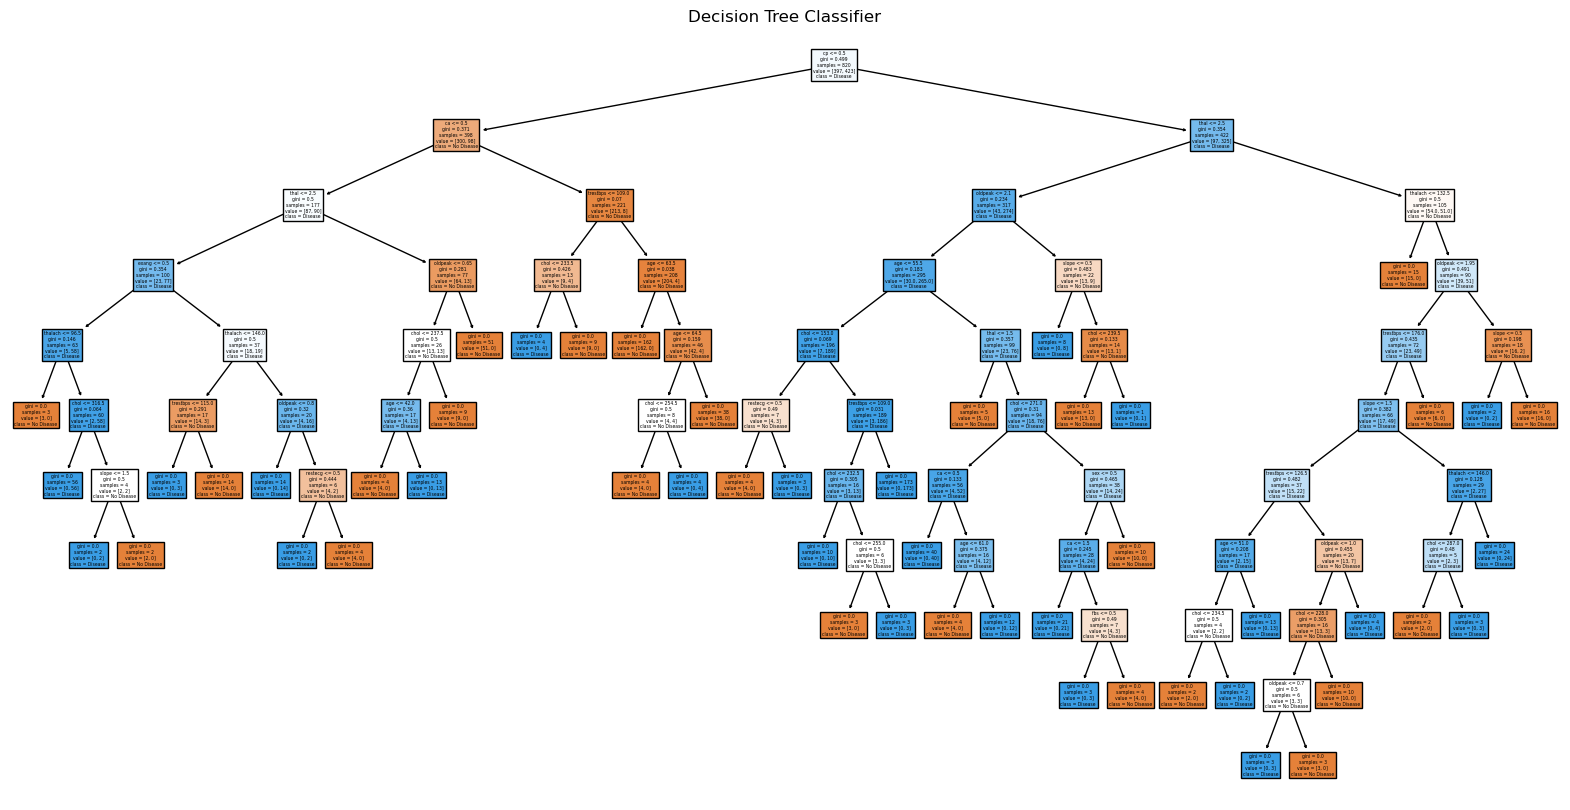

In [13]:
# Train Decision Tree
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Visualize Tree
plt.figure(figsize=(20, 10))
plot_tree(dtree, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True)
plt.title("Decision Tree Classifier")
plt.show()

In [14]:
# Accuracy without depth limit
train_acc_full = accuracy_score(y_train, dtree.predict(X_train))
test_acc_full = accuracy_score(y_test, dtree.predict(X_test))

# Prune tree
dtree_pruned = DecisionTreeClassifier(max_depth=4, random_state=42)
dtree_pruned.fit(X_train, y_train)

# Accuracy with limited depth
train_acc_pruned = accuracy_score(y_train, dtree_pruned.predict(X_train))
test_acc_pruned = accuracy_score(y_test, dtree_pruned.predict(X_test))

print("Full Tree: Train Acc =", train_acc_full, ", Test Acc =", test_acc_full)
print("Pruned Tree: Train Acc =", train_acc_pruned, ", Test Acc =", test_acc_pruned)


Full Tree: Train Acc = 1.0 , Test Acc = 0.9853658536585366
Pruned Tree: Train Acc = 0.8829268292682927 , Test Acc = 0.8


In [15]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate Random Forest
train_acc_rf = accuracy_score(y_train, rf.predict(X_train))
test_acc_rf = accuracy_score(y_test, rf.predict(X_test))

print("Random Forest: Train Acc =", train_acc_rf, ", Test Acc =", test_acc_rf)


Random Forest: Train Acc = 1.0 , Test Acc = 0.9853658536585366


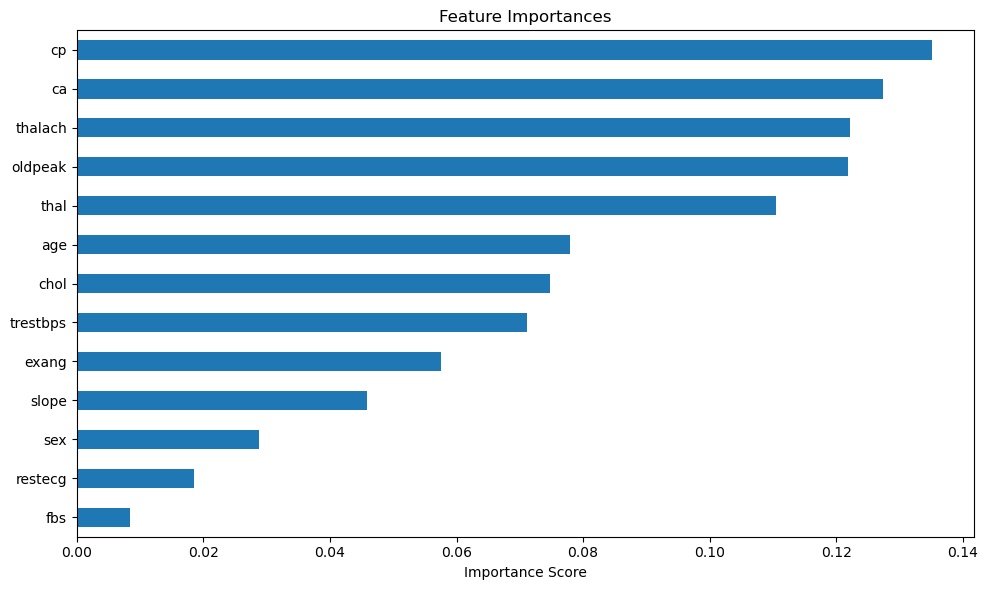

In [16]:
# Feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10, 6), title="Feature Importances")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


In [17]:
# Cross-validation
cv_scores_dt = cross_val_score(dtree_pruned, X, y, cv=5)
cv_scores_rf = cross_val_score(rf, X, y, cv=5)

print("Decision Tree CV Accuracy:", cv_scores_dt.mean())
print("Random Forest CV Accuracy:", cv_scores_rf.mean())


Decision Tree CV Accuracy: 0.8341463414634147
Random Forest CV Accuracy: 0.9970731707317073
